In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
total_crop_dataset = pd.read_csv('../crop_production.csv')

In [ ]:
maharashtra = total_crop_dataset[total_crop_dataset['State_Name']=='Maharashtra']

In [ ]:
maharashtra.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0


In [ ]:
maharashtra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12628 entries, 125191 to 137818
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     12628 non-null  object 
 1   District_Name  12628 non-null  object 
 2   Crop_Year      12628 non-null  int64  
 3   Season         12628 non-null  object 
 4   Crop           12628 non-null  object 
 5   Area           12628 non-null  float64
 6   Production     12496 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 789.2+ KB


In [ ]:
maharashtra.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Area               0
Production       132
dtype: int64

In [ ]:
maharashtra = maharashtra.dropna()

In [ ]:
maharashtra['District_Name'].nunique()

35

In [ ]:
maharashtra_filtered = maharashtra[
    (maharashtra['Crop']=='Wheat') |
    (maharashtra['Crop']=='Rice')  |
    (maharashtra['Crop']=='Jowar')  |
    (maharashtra['Crop']=='Bajra')  |
    (maharashtra['Crop']=='Cardamom')  |
    (maharashtra['Crop']=='Garlic')  |
    (maharashtra['Crop']=='Turmeric')  |
    (maharashtra['Crop']=='Ginger')  |
    (maharashtra['Crop']=='Cotton(lint)')  |
    (maharashtra['Crop']=='Linseed')  |
    (maharashtra['Crop']=='Sesamum')  |
    (maharashtra['Crop']=='Coconut ')  |
    (maharashtra['Crop']=='Onion')  |
    (maharashtra['Crop']=='Arhar/Tur')  |
    (maharashtra['Crop']=='Potato')  |
    (maharashtra['Crop']=='Maize')
]

In [ ]:
maharashtra_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 125191 to 137816
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     5465 non-null   object 
 1   District_Name  5465 non-null   object 
 2   Crop_Year      5465 non-null   int64  
 3   Season         5465 non-null   object 
 4   Crop           5465 non-null   object 
 5   Area           5465 non-null   float64
 6   Production     5465 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 341.6+ KB


In [ ]:
maharashtra_filtered_ohe = pd.get_dummies(maharashtra_filtered, columns=['District_Name', 'Season','Crop'],drop_first=True)

In [ ]:
maharashtra_filtered_ohe.head()

,State_Name,Crop_Year,Area,Production,District_Name_AKOLA,District_Name_AMRAVATI,District_Name_AURANGABAD,District_Name_BEED,District_Name_BHANDARA,District_Name_BULDHANA,...,Season_Whole Year,Crop_Bajra,Crop_Cotton(lint),Crop_Jowar,Crop_Linseed,Crop_Maize,Crop_Onion,Crop_Rice,Crop_Sesamum,Crop_Wheat
125191,Maharashtra,1997,1.0,1113.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
125192,Maharashtra,1997,17600.0,6300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125193,Maharashtra,1997,274100.0,152800.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
125195,Maharashtra,1997,900.0,1100.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
125196,Maharashtra,1997,4400.0,4700.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
maharashtra_filtered_ohe[(maharashtra_filtered_ohe['Area']==31500.)].transpose()

,128168,129535,129817,131969,134492
State_Name,Maharashtra,Maharashtra,Maharashtra,Maharashtra,Maharashtra
Crop_Year,2003,2008,2002,2003,2014
Area,31500,31500,31500,31500,31500
Production,19600,34500,49900,43500,26300
District_Name_AKOLA,0,0,0,0,0
District_Name_AMRAVATI,0,0,0,0,0
District_Name_AURANGABAD,0,0,0,0,0
District_Name_BEED,0,0,0,0,0
District_Name_BHANDARA,0,0,0,0,0
District_Name_BULDHANA,0,0,0,0,0


In [ ]:
maharashtra_filtered_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5465 entries, 125191 to 137816
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State_Name                5465 non-null   object 
 1   Crop_Year                 5465 non-null   int64  
 2   Area                      5465 non-null   float64
 3   Production                5465 non-null   float64
 4   District_Name_AKOLA       5465 non-null   uint8  
 5   District_Name_AMRAVATI    5465 non-null   uint8  
 6   District_Name_AURANGABAD  5465 non-null   uint8  
 7   District_Name_BEED        5465 non-null   uint8  
 8   District_Name_BHANDARA    5465 non-null   uint8  
 9   District_Name_BULDHANA    5465 non-null   uint8  
 10  District_Name_CHANDRAPUR  5465 non-null   uint8  
 11  District_Name_DHULE       5465 non-null   uint8  
 12  District_Name_GADCHIROLI  5465 non-null   uint8  
 13  District_Name_GONDIA      5465 non-null   uint8  
 14  D

In [ ]:
maharashtra_filtered_ohe.columns

Index(['State_Name', 'Crop_Year', 'Area', 'Production', 'District_Name_AKOLA',
       'District_Name_AMRAVATI', 'District_Name_AURANGABAD',
       'District_Name_BEED', 'District_Name_BHANDARA',
       'District_Name_BULDHANA', 'District_Name_CHANDRAPUR',
       'District_Name_DHULE', 'District_Name_GADCHIROLI',
       'District_Name_GONDIA', 'District_Name_HINGOLI',
       'District_Name_JALGAON', 'District_Name_JALNA',
       'District_Name_KOLHAPUR', 'District_Name_LATUR', 'District_Name_MUMBAI',
       'District_Name_NAGPUR', 'District_Name_NANDED',
       'District_Name_NANDURBAR', 'District_Name_NASHIK',
       'District_Name_OSMANABAD', 'District_Name_PALGHAR',
       'District_Name_PARBHANI', 'District_Name_PUNE', 'District_Name_RAIGAD',
       'District_Name_RATNAGIRI', 'District_Name_SANGLI',
       'District_Name_SATARA', 'District_Name_SINDHUDURG',
       'District_Name_SOLAPUR', 'District_Name_THANE', 'District_Name_WARDHA',
       'District_Name_WASHIM', 'District_Name_YA

In [ ]:
X = maharashtra_filtered_ohe.drop(['State_Name','Crop_Year','Production'],axis=1).values
y = maharashtra_filtered_ohe.iloc[:,3].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
linear_regression = LinearRegression()
lasso = Lasso(alpha=100,max_iter=10000)

In [ ]:
linear_regression.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso(alpha=100, max_iter=10000)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()

In [ ]:
rfregressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfregressor.predict(X_test)

In [ ]:
X_train[0]

array([3.15e+04, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00])

In [ ]:
len(X_test[0])

48

In [ ]:
accuracy = rfregressor.score(X_test,y_test)
print(accuracy*100,'%')

81.20256400045542 %


In [ ]:
accuracy = lasso.score(X_test,y_test)
print(accuracy*100,'%')

68.77295150219834 %


In [ ]:
accuracy = linear_regression.score(X_test,y_test)
print(accuracy*100,'%')

69.22897418999504 %


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

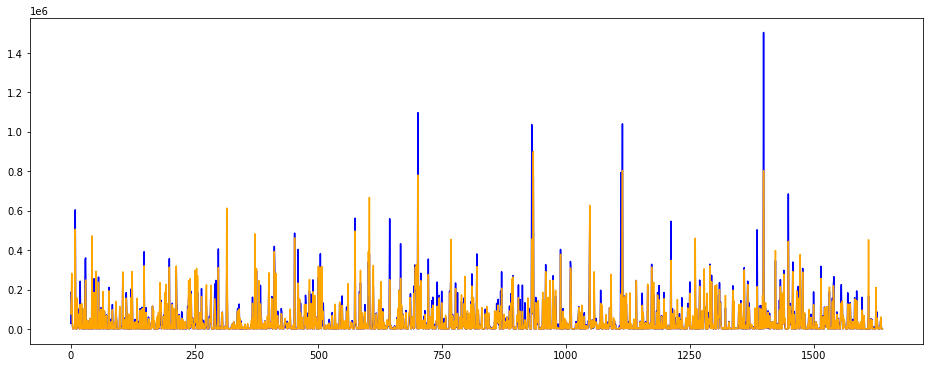

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(y_test,color='blue')
plt.plot(y_pred,color='orange')

In [ ]:
filename = 'Maharashtra_Model.sav'
pickle.dump(rfregressor, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
predict = loaded_model.predict([31500.0,])
print('Accuracy- ', result*100,'%')
print('Prediction- ')

Accuracy-  81.20256400045542 %
Prediction- 


In [ ]:
def maharashtra_dict(area,district_name,season_name,crop_name):
    mh_dict = {
       'area':0,
       'District_Name_AKOLA':0,
       'District_Name_AMRAVATI':0,
       'District_Name_AURANGABAD':0,
       'District_Name_BEED':0,
       'District_Name_BHANDARA':0,
       'District_Name_BULDHANA':0,
       'District_Name_CHANDRAPUR':0,
       'District_Name_DHULE':0,
       'District_Name_GADCHIROLI':0,
       'District_Name_GONDIA':0,
       'District_Name_HINGOLI':0,
       'District_Name_JALGAON':0,
       'District_Name_JALNA':0,
       'District_Name_KOLHAPUR':0,
       'District_Name_LATUR':0,
       'District_Name_MUMBAI':0,
       'District_Name_NAGPUR':0,
       'District_Name_NANDED':0,
       'District_Name_NANDURBAR':0,
       'District_Name_NASHIK':0,
       'District_Name_OSMANABAD':0,
       'District_Name_PALGHAR':0,
       'District_Name_PARBHANI':0,
       'District_Name_PUNE':0,
       'District_Name_RAIGAD':0,
       'District_Name_RATNAGIRI':0,
       'District_Name_SANGLI':0,
       'District_Name_SATARA':0,
       'District_Name_SINDHUDURG':0,
       'District_Name_SOLAPUR':0,
       'District_Name_THANE':0,
       'District_Name_WARDHA':0,
       'District_Name_WASHIM':0,
       'District_Name_YAVATMAL':0,
       'Season_Kharif     ':0,
       'Season_Rabi       ':0,
       'Season_Summer     ':0,
       'Season_Whole Year ':0,
       'Crop_Bajra':0,
       'Crop_Cotton(lint)':0,
       'Crop_Jowar':0,
       'Crop_Linseed':0,
       'Crop_Maize':0,
       'Crop_Onion':0,
       'Crop_Rice':0,
       'Crop_Sesamum':0,
       'Crop_Wheat':0
      }
    mh_dict['area'] = area
    mh_dict[district_name] = 1
    mh_dict[season_name] = 1
    mh_dict[crop_name] = 1
    data = list(mh_dict.values())
    input_arr = np.array(data)
    print(input_arr)
    return input_arr

In [ ]:
arr = maharashtra_dict(31500,'District_Name_NANDED','Season_Rabi       ','Crop_Wheat')

[31500     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     1     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     1     0     0     0     0     0     0     0     0     0     0     1]


In [ ]:
predict = loaded_model.predict([arr])

In [ ]:
predict

array([43183.])